In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import scipy as sp
import datajoint as dj

In [3]:
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, tracking
from pipeline.plot import behavior_plot

Connecting root@127.0.0.1:3306


In [7]:
session_keys = experiment.Session.fetch('KEY')

In [8]:
session_key = session_keys[0]

# Plot proportional 'correct' for one session

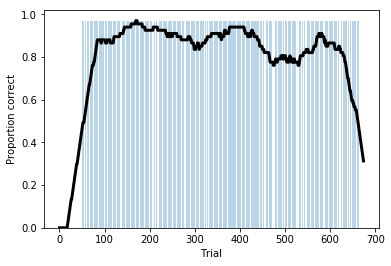

In [15]:
behavior_plot.plot_correct_proportion(session_key)

# Plot proportional 'correct' for one session, modulated by photostim

In [19]:
photostims = experiment.Photostim * experiment.BrainLocation

In [21]:
left_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="left"').fetch1('KEY')
right_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="right"').fetch1('KEY')
bi_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="both"').fetch1('KEY')

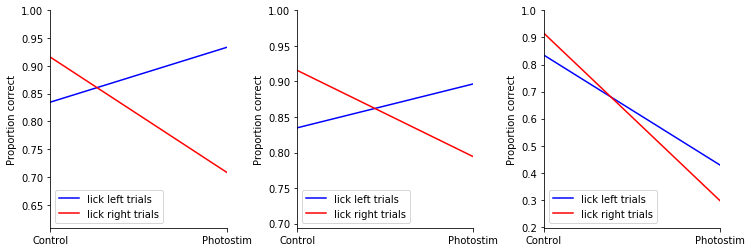

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)
behavior_plot.plot_photostim_effect(session_key, left_alm_photostim, axis=axs[0])
behavior_plot.plot_photostim_effect(session_key, right_alm_photostim, axis=axs[1])
behavior_plot.plot_photostim_effect(session_key, bi_alm_photostim, axis=axs[2])

# Plot movement tracking 

In [142]:
jaw_tracking = tracking.Tracking.JawTracking * tracking.Tracking.TongueTracking * experiment.BehaviorTrial & session_key
tracking_fs = float((tracking.TrackingDevice & tracking.Tracking & session_key).fetch1('sampling_rate'))

In [143]:
l_trial_jaw = jaw_tracking & 'trial_instruction="left"' & 'early_lick="no early"'
r_trial_jaw = jaw_tracking & 'trial_instruction="right"' & 'early_lick="no early"'

In [144]:
l_trial_jaw

subject_id institution 6 digit animal ID,session session number,trial trial number,tracking_device device type/function,jaw_x jaw x location (px),jaw_y jaw y location (px),jaw_likelihood jaw location likelyhood,tongue_x tongue x location (px),tongue_y tongue y location (px),tongue_likelihood tongue location likelyhood,task task type,task_protocol task protocol,trial_instruction,early_lick,outcome
435884,1,12,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,audio delay,1,left,no early,ignore
435884,1,13,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,audio delay,1,left,no early,ignore
435884,1,16,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,audio delay,1,left,no early,ignore
435884,1,17,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,audio delay,1,left,no early,ignore
435884,1,18,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,audio delay,1,left,no early,ignore
435884,1,19,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,audio delay,1,left,no early,ignore
435884,1,50,Camera 0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,audio delay,1,left,no early,ignore


In [145]:
jaw_trackings = l_trial_jaw.fetch(as_dict=True, limit=20)

In [151]:
jaw_tracking = jaw_trackings[3]
sample_counts = len(jaw_tracking['jaw_x'])
tvec = np.arange(sample_counts)/tracking_fs

In [152]:
tongue_thres=430

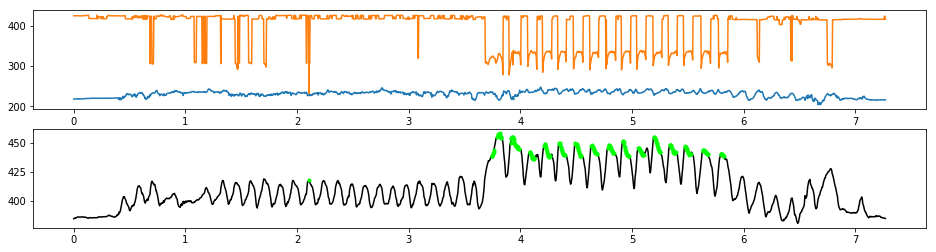

In [156]:
fig, axs = plt.subplots(2, 1, figsize=(16, 4))
axs[0].plot(tvec, jaw_tracking['jaw_x'])
axs[0].plot(tvec, jaw_tracking['tongue_x'])
axs[1].plot(tvec, jaw_tracking['jaw_y'], 'k')
axs[1].plot(tvec[jaw_tracking['tongue_y']>=tongue_thres], jaw_tracking['jaw_y'][jaw_tracking['tongue_y']>=tongue_thres], '.', color='lime')

In [141]:
experiment.TrialEvent * 

subject_id institution 6 digit animal ID,session session number,trial trial number,trial_event_id,trial_event_type,"trial_event_time (s) from trial start, not session start",duration (s)
435884,1,0,0,presample,0.5000,0.8717
435884,1,0,1,go,3.7717,0.1000
435884,1,0,2,sample,1.3717,1.2000
435884,1,0,4,trialend,4.2717,0.0000
435884,1,1,5,presample,0.5000,0.8990
435884,1,1,6,go,3.7990,0.1000
435884,1,1,7,sample,1.3990,1.2000


======================================================================================

In [77]:
importlib.reload(behavior_plot)

<module 'pipeline.plot.behavior_plot' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\MAP\\map-ephys\\pipeline\\plot\\behavior_plot.py'>